## Pokemon Team Build

The goal of this project is to utilize exploratory data analysis (EDA) and K-means clustering to develop a machine learning based tool that can determine good Pokemon teams. 

In [3]:
# import data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read in Pokemon dataset from Kaggle
pokemon = pd.read_csv('../Data/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Exploratory Data Analysis

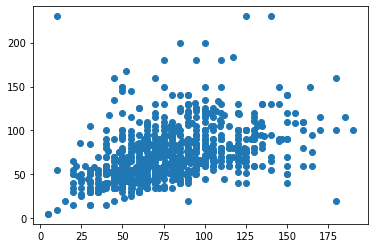

In [6]:
# plotting attack against defense
plt.scatter(pokemon['Attack'], pokemon['Defense'])

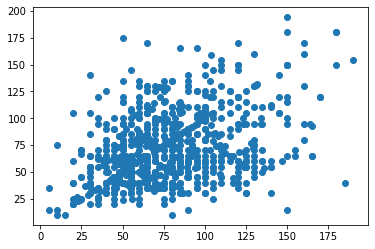

In [7]:
# plotting attack against special attack
plt.scatter(pokemon['Attack'], pokemon['Sp. Atk'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


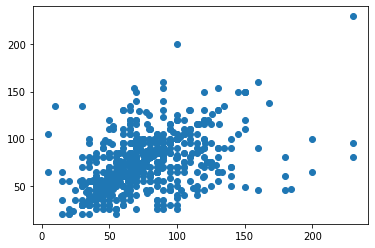

In [18]:
# plotting defense against special defense
plt.scatter(pokemon['Defense'], pokemon['Sp. Def'])

# locate outlier
pokemon.loc[pokemon['Defense'] > 200, ]

Defense Mean: 73.8425
Defense Standard Deviation: 31.164004777146342
Special Defense Mean: 71.9025
Special Defense Standard Deviation: 27.81151728600941
Z Score for Shuckle's Defense: 5.010829035506879
Z Score for Shuckle's Special Defense: 5.684605351594067


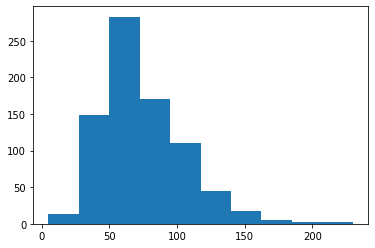

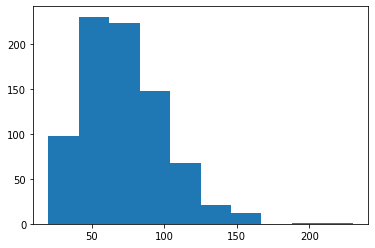

In [37]:
# plot histogram of defense and special defense
plt.figure(1)
plt.hist(pokemon['Defense'])

plt.figure(2)
plt.hist(pokemon['Sp. Def'])

# calculate the mean and standard deviation of Shuckle's defense and special defense
print('Defense Mean: ' + str(np.mean(pokemon['Defense'])))
print('Defense Standard Deviation: ' + str(np.std(pokemon['Defense'])))
print('Special Defense Mean: ' + str(np.mean(pokemon['Sp. Def'])))
print('Special Defense Standard Deviation: ' + str(np.std(pokemon['Sp. Def'])))

shuckle_def = 230
shuckle_sp_def = 230

def_std = (230 - np.mean(pokemon['Defense'])) / np.std(pokemon['Defense'])
sp_def_std = (230 - np.mean(pokemon['Sp. Def'])) / np.std(pokemon['Sp. Def'])
print("Z Score for Shuckle's Defense: " + str(def_std))
print("Z Score for Shuckle's Special Defense: " + str(sp_def_std))

It appears the Shuckle is a defensive outlier, being a Pokemon with both greater than 200 special attack and 200 attack. The histogram distributions for defense and special defense are roughly normal, though not exactly normal. With Z scores of 5, it seems that both Shuckle's defense and special defense are outliers for this dataset of all the Pokemon. Both of these arrays seem to present data with a slight right skew.

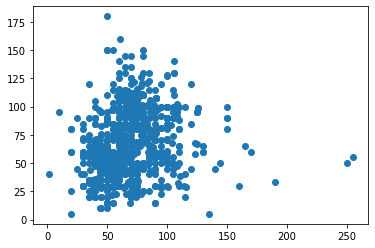

In [9]:
# plotting hp against speed
plt.scatter(pokemon['HP'], pokemon['Speed'])

It seems that there is slight positive correlation between attack and special attack, attack and defense, and a stronger positive correlation between defense and special defense. These trends would make sense, since they would generally be indicative of stronger overall Pokemon (like third stage evolutions), which should have higher overall stats. 

It also appears that there is no correlation, or very little correlation, between a Pokemon's HP and Speed. This would also make sense, since there should be very little relationship between a Pokemon's speed and its HP, since there are Pokemon that would have high HP and speed (like Samurott from Po